plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [26]:
import matplotlib.pyplot as plt
import pandas as pd

#matplotlib notebook

In [27]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv("Last.txt", skiprows=7)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [28]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [29]:
#print(dfc)
print(df)

               time       pos  npart     maxt          isem          ithc
0      4.000000e+01 -120.0000    0.0  300.000  3.000926e-83  4.661418e-57
1      8.000000e+01 -119.9976    0.0  300.000  3.023494e-83  4.661418e-57
2      1.200000e+02 -119.9952    0.0  300.000  3.046231e-83  4.661418e-57
3      1.600000e+02 -119.9928    0.0  300.000  3.069138e-83  4.661418e-57
4      2.000000e+02 -119.9904    0.0  300.000  3.092218e-83  4.661418e-57
...             ...       ...    ...      ...           ...           ...
99995  3.999840e+06  119.9880    0.0  784.476  3.115470e-83  3.115878e-15
99996  3.999880e+06  119.9904    0.0  784.471  3.092218e-83  3.114730e-15
99997  3.999920e+06  119.9928    0.0  784.467  3.069138e-83  3.113582e-15
99998  3.999960e+06  119.9952    0.0  784.462  3.046231e-83  3.112435e-15
99999  4.000000e+06  119.9976    0.0  784.457  3.023494e-83  3.111289e-15

[100000 rows x 6 columns]


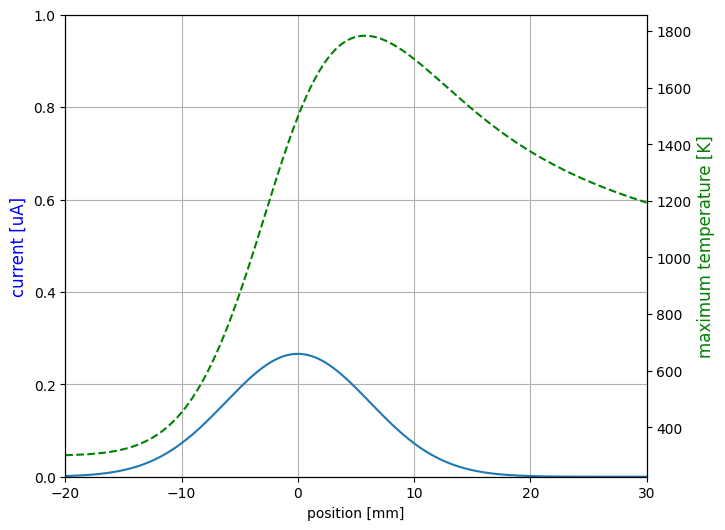

In [30]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

ax.set_xlim(-20,30)
hsimse, = ax.plot([x*1 for x in df["pos"]],[4*x for x in df["isem"]],label="SEM current [uA]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[1e0*x for x in df["ithc"]],label="thermionic current [uA]")
scale=df["isem"].max()/df["npart"].max()
#hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_ylim(0,1)

axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

#ax.legend(handles=[hsimse,hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
ax.grid()

plt.savefig('all.png')

In [31]:
print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])

dt [us] =  40.0


In [32]:
# max SEM current [uA] 
print(4*max(df['isem']))

0.2659474100432288
